# View and descriptive analysis of the event-based datasets


In [1]:
import os
import time

import numpy as np
np.random.seed(0)
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

from multiprocessing import Pool

# Load methods
%matplotlib inline

In [2]:
# importer for the data
from data_loader import load_heart_beats, load_breath_rate, load_step_rate

In [3]:
# directories to load
PATH_HEART_RATE_DATA = "../data/HeartBeatData"
PATH_BREATH_RATE_DATA = "../data/BreathRateData"
PATH_STEP_RATE_DATA = "../data/StepRateData"

## Data

### Load the datasets

In [4]:
heart_beat_dataset = load_heart_beats(path_to_dir=PATH_HEART_RATE_DATA, verbose=1)

Loading files S18_11_nn.txt and S18_1_beats_synced.csv.
Loading files S18_21_nn.txt and S18_2_beats_synced.csv.
Loading files S19_11_nn.txt and S19_1_beats_synced.csv.
Loading files S20_11_nn.txt and S20_1_beats_synced.csv.
Loading files S20_21_nn.txt and S20_2_beats_synced.csv.
Loading files S21_11_nn.txt and S21_1_beats_synced.csv.
Loading files S21_21_nn.txt and S21_2_beats_synced.csv.
Loading files S23_11_nn.txt and S23_1_beats_synced.csv.
Loading files S23_21_nn.txt and S23_2_beats_synced.csv.
Loading files S24_11_nn.txt and S24_1_beats_synced.csv.
Loading files S24_21_nn.txt and S24_2_beats_synced.csv.
Loading files S26_11_nn.txt and S26_1_beats_synced.csv.
Loading files S27_11_nn.txt and S27_1_beats_synced.csv.
Loading files S28_11_nn.txt and S28_1_beats_synced.csv.
Loading files S28_21_nn.txt and S28_2_beats_synced.csv.
Loading files S29_11_nn.txt and S29_1_beats_synced.csv.
Loading files S29_21_nn.txt and S29_2_beats_synced.csv.


In [5]:
breath_rate_dataset = load_breath_rate(path_to_dir=PATH_BREATH_RATE_DATA, verbose=1)

Loading files P05_Reference_FlowReversals_OVERALL.csv and P05_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P06_Reference_FlowReversals_OVERALL.csv and P06_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P07_Reference_FlowReversals_OVERALL.csv and P07_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P08_Reference_FlowReversals_OVERALL.csv and P08_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P09_Reference_FlowReversals_OVERALL.csv and P09_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P10_Reference_FlowReversals_OVERALL.csv and P10_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P11_Reference_FlowReversals_OVERALL.csv and P11_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P12_Reference_FlowReversals_OVERALL.csv and P12_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P13_Reference_FlowReversals_OVERALL.csv and P13_SportsSRS_FlowReversals_OVERALL.csv.
Loading files P14_Reference_FlowReversals_OVERALL.csv and P14_SportsSRS_FlowReversals_OVERALL.csv.
Loading fi

In [6]:
step_rate_dataset = load_step_rate(path_to_dir=PATH_STEP_RATE_DATA, verbose=1)

Loading files P04_Reference_Strides_OVERALL.csv and P04_SportsSRS_Strides_OVERALL.csv.
Loading files P06_Reference_Strides_OVERALL.csv and P06_SportsSRS_Strides_OVERALL.csv.
Loading files P07_Reference_Strides_OVERALL.csv and P07_SportsSRS_Strides_OVERALL.csv.
Loading files P08_Reference_Strides_OVERALL.csv and P08_SportsSRS_Strides_OVERALL.csv.
Loading files P09_Reference_Strides_OVERALL.csv and P09_SportsSRS_Strides_OVERALL.csv.
Loading files P10_Reference_Strides_OVERALL.csv and P10_SportsSRS_Strides_OVERALL.csv.
Loading files P11_Reference_Strides_OVERALL.csv and P11_SportsSRS_Strides_OVERALL.csv.
Loading files P12_Reference_Strides_OVERALL.csv and P12_SportsSRS_Strides_OVERALL.csv.
Loading files P13_Reference_Strides_OVERALL.csv and P13_SportsSRS_Strides_OVERALL.csv.
Loading files P16_Reference_Strides_OVERALL.csv and P16_SportsSRS_Strides_OVERALL.csv.
Loading files P18_Reference_Strides_OVERALL.csv and P18_SportsSRS_Strides_OVERALL.csv.
Loading files P19_Reference_Strides_OVERALL

### Statistics of the datasets

In [7]:
n_measurements = 2 * len((heart_beat_dataset + breath_rate_dataset + step_rate_dataset))

df_measurements = pd.DataFrame(columns=["dataset", "length", "count", "mean_diff", "median_diff"], 
                               index=range(n_measurements))
idx = 0
for data_idx, dataset in enumerate((heart_beat_dataset, breath_rate_dataset, step_rate_dataset)):
    for m in dataset:
        for array in m:
            df_measurements.loc[idx, "dataset"] = {0: "HR", 1: "BR", 2: "SR"}.get(data_idx)
            df_measurements.loc[idx, "count"] = len(array)
            df_measurements.loc[idx, "length"] = array[-1] - array[0]
            df_measurements.loc[idx, "mean_diff"] = np.mean(np.diff(array))
            df_measurements.loc[idx, "median_diff"] = np.median(np.diff(array))
            idx += 1
            
df_measurements.describe()

,dataset,length,count,mean_diff,median_diff
count,96,96.000,96,96.000000,96.0
unique,3,96.000,95,96.000000,89.0
top,HR,28918.762,2724,1.008993,0.9
freq,34,1.000,2,1.000000,4.0


In [8]:
# measurement counts
df_measurements.groupby("dataset").agg({"dataset": "count", "count": "sum", "length": "mean", 
                                        "mean_diff": "mean", "median_diff": "mean"})

,dataset,count,length,mean_diff,median_diff
dataset,,,,,
BR,34,80498,2473.390669,1.053056,0.977503
HR,34,900934,27844.688509,1.058960,1.053532
SR,28,149100,2419.902794,0.467079,0.385081


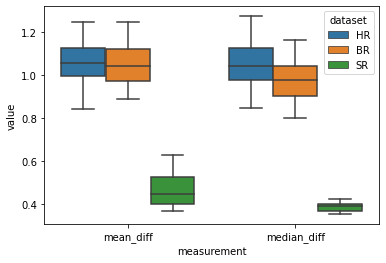

In [9]:
# melt the dataset for the plot
df_measurements_melted = pd.melt(
    df_measurements, id_vars="dataset", var_name="measurement", 
    value_vars=["count", "length", "mean_diff", "median_diff"], value_name="value")

df_tmp = df_measurements_melted[df_measurements_melted["measurement"].isin(["mean_diff", "median_diff"])]
sns.boxplot(data=df_tmp, 
            y="value", x="measurement", hue="dataset")
plt.show()